## Learning Notebook: From Logistic Regression to Neural Networks (CIFAR-10)

### Overview

This notebook is both an **exercise and a learning resource**. It will guide you through applying **logistic regression** and a **basic neural network** to the **CIFAR-10 image classification dataset**. You'll explore how neural networks build on classical techniques and why they perform better on complex data like images.

### Context

This notebook highlights the most important steps to build a very simple fully conntected Neural Network with couple of layers. You will have to prepare the data for the model, apply the right loss function, and the right optimizer. 

### Goal:
- Train a logistic regression classifier on CIFAR-10 using flattened image vectors
- Train a neural network with at least one hidden layer and compare its performance
- Experiment with different learning rates and compare the results
- Visualize and interpret confusion matrices and train/test loss curves
- (Optional) Experiment with different hidden layer sizes and observe how accuracy changes
- (Optional) Add a second hidden layer and evaluate the impact
- (Optional) try to add learning rate decay and dropout


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [11]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

### Read and process the data

In [12]:
# Load CIFAR-10 dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [14]:
# flatten the output class 
"""
flatten since cifar10.load_data() return output with a 2D array. We want it to be a 1D array

"""
y_train = y_train.flatten()
y_test = y_test.flatten()

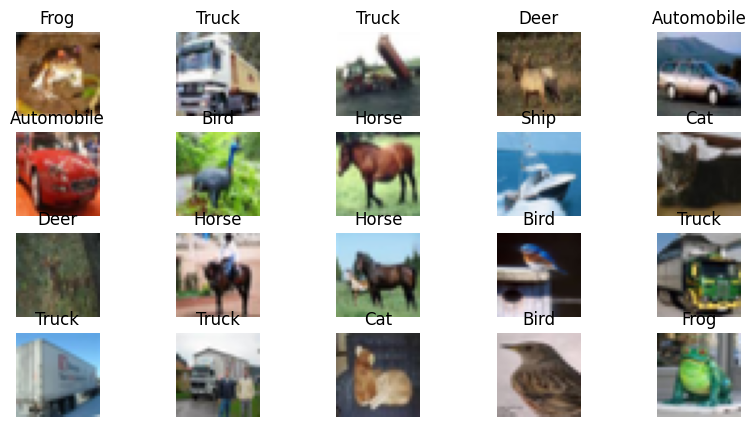

In [15]:
# Visualize Some input images with their classes
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [17]:
# Normalize the input vectors (min-max scaling)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [22]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [23]:
# Flatten the input since we will work with pixel values in the shape of vectors as input to FCNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [24]:
X_train_flat

array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.13725491, 0.69803923, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.7411765 , 0.827451  , 0.9411765 , ..., 0.7647059 , 0.74509805,
        0.67058825],
       [0.8980392 , 0.8980392 , 0.9372549 , ..., 0.6392157 , 0.6392157 ,
        0.6313726 ]], dtype=float32)

In [25]:
#check unique value of output y
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
# One-hot encoding needed for the softmax function of the neural network
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [28]:
# y_train_cat
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

### Build and train a logistic regression model

✅ Task: complete the following code by building a Logistic Regression using sklearn functions, train for 100 iterations.

In [29]:
# Subsample for logistic regression
n_samples = 10000  # or 1000 for faster results
MAX_ITER = 100 # or 500, 1000

# split to train and test data 
X_train_flat_sub = X_train_flat[:n_samples]
y_train_sub = y_train[:n_samples]
# code the logistic regression model and train it for 100 iterations, and try different solvers (at least two)
logreg = LogisticRegression(max_iter=MAX_ITER, solver='saga', verbose=1)
logreg.fit(X_train_flat_sub, y_train_sub)

Epoch 1, change: 1
Epoch 2, change: 0.30509663
Epoch 3, change: 0.20394802
Epoch 4, change: 0.13070649
Epoch 5, change: 0.13649619
Epoch 6, change: 0.096677758
Epoch 7, change: 0.084811814
Epoch 8, change: 0.070437454
Epoch 9, change: 0.064642198
Epoch 10, change: 0.056438003
Epoch 11, change: 0.051335476
Epoch 12, change: 0.047037017
Epoch 13, change: 0.042097062
Epoch 14, change: 0.039100837
Epoch 15, change: 0.036090214
Epoch 16, change: 0.033331174
Epoch 17, change: 0.031136714
Epoch 18, change: 0.029204898
Epoch 19, change: 0.027736127
Epoch 20, change: 0.026230896
Epoch 21, change: 0.024452858
Epoch 22, change: 0.023342161
Epoch 23, change: 0.022573981
Epoch 24, change: 0.021380059
Epoch 25, change: 0.020703038
Epoch 26, change: 0.019881494
Epoch 27, change: 0.019196827
Epoch 28, change: 0.018258903
Epoch 29, change: 0.017945863
Epoch 30, change: 0.016991375
Epoch 31, change: 0.016718088
Epoch 32, change: 0.016190169
Epoch 33, change: 0.015593841
Epoch 34, change: 0.015451658
Epo

/Users/LarryDinh/Documents/Python/project/rag-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


✅ Task: print the classification report on the complete test data and on the complete train data. Are the results better than random classifier?

In [31]:
y_train_pred_log = logreg.predict(X_train_flat)
y_test_pred_log = logreg.predict(X_test_flat)

print(
    "Train data report:\n", classification_report(y_train, y_train_pred_log)
)

print(
    "Test data report:\n", classification_report(y_test, y_test_pred_log)
)

Train data report:
               precision    recall  f1-score   support

           0       0.46      0.47      0.47      5000
           1       0.47      0.47      0.47      5000
           2       0.33      0.31      0.32      5000
           3       0.30      0.28      0.29      5000
           4       0.37      0.34      0.35      5000
           5       0.34      0.31      0.33      5000
           6       0.41      0.45      0.43      5000
           7       0.45      0.45      0.45      5000
           8       0.48      0.55      0.51      5000
           9       0.46      0.46      0.46      5000

    accuracy                           0.41     50000
   macro avg       0.41      0.41      0.41     50000
weighted avg       0.41      0.41      0.41     50000

Test data report:
               precision    recall  f1-score   support

           0       0.44      0.45      0.44      1000
           1       0.45      0.43      0.44      1000
           2       0.27      0.27      

✅ Task: plot the Confusion Matrices for the logistic regression 

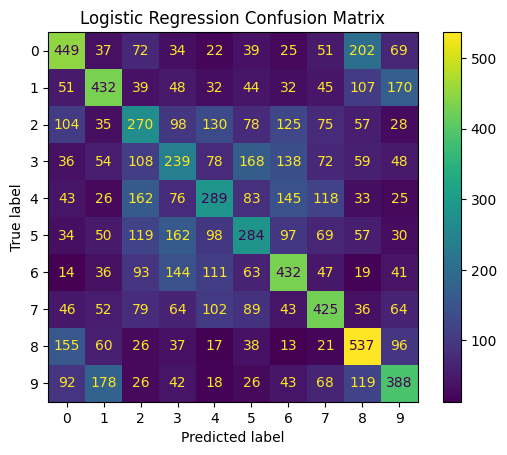

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_log)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## OBSERVATION !!!
1. Using solver = 'saga' or solver 'sag' or solver = 'lbfgs' (default) did not improve the accuracy significanly. The precision is between 29% and 48%, which is better than random value (10%) but still far from what we need to find from the model.  
2. Perfomance not improved by some reason:  
- Model complexity: logistic regression is a linear classifier, hence for non-linear data it has limited performance.
- The model is underfitting.
- Can be improved by using non-linear models (NN, kervel SVM) or feature engineer: PCA, image descriptor.


### Build and train a Neural Network

### Build the neural network model

The model can contain several hidden layers, and as it generates **multinomial classifications** of the input images, we need to apply the **softmax function** to the output logits. 


### Neural Network Architecture Summary

Build  a **simple feedforward neural network** for image classification on CIFAR-10. Add the following layers:

1. **Input Layer (Flatten)**

   * Converts each input image from shape **(32, 32, 3)** into a **1D vector of size 3072** (32 × 32 × 3).
   * This prepares the image data for fully connected layers.

2. **Hidden Layer (Dense)**

   * A fully connected layer with **128 neurons**.
   * Uses the **ReLU** activation function to introduce non-linearity.

3. **Output Layer (Dense)**

   * A fully connected layer with **10 neurons**, one for each class in CIFAR-10.
   * Uses **softmax** activation to output a probability distribution over the 10 classes.


#### What is the Softmax Function?

The **softmax function** is a normalized exponential function that maps a vector of continuous values (logits) into a vector of probabilities, ensuring that:
- All probabilities are non-negative.
- The sum of the probabilities equals 1.

#### Softmax Equation
The softmax function is defined as:

$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}$$

Where:
- \( $z_i$): Logit (input to the softmax function) for class (i).
- \( $N$): Total number of classes.
- \( $e^{z_i}$): Exponential of the logit for class (i).
- \( $\sigma(z_i)$): Probability for class (i).

---

#### Example Input and Output

Let’s consider a vector of logits \( z \) for a 10-class problem:


$$z = [2.0, 1.0, 0.1, -1.0, 0.5, -0.2, 1.5, -0.5, 0.3, -1.5]$$

Using the softmax function, we calculate the probabilities:

1. Compute ($e^{z_i}$) for each ( $z_i$):

   $$e^z = [7.39, 2.72, 1.11, 0.37, 1.65, 0.82, 4.48, 0.61, 1.35, 0.22]$$


2. Compute the sum of all exponentials:

   $$\text{Sum} = 20.72$$

3. Normalize each exponential by dividing by the sum:

   $$\sigma(z) = \frac{e^z}{\text{Sum}} = [0.356, 0.131, 0.054, 0.018, 0.080, 0.039, 0.216, 0.030, 0.065, 0.011]$$

#### Final Probabilities
The output probabilities are:

$$[0.356, 0.131, 0.054, 0.018, 0.080, 0.039, 0.216, 0.030, 0.065, 0.011]$$

These probabilities sum up to 1 and can be interpreted as the likelihood of the input belonging to each class.

--- 

#### Use in Classification
The class with the highest probability (e.g., $\text{argmax}(\sigma(z))$) is the predicted class.


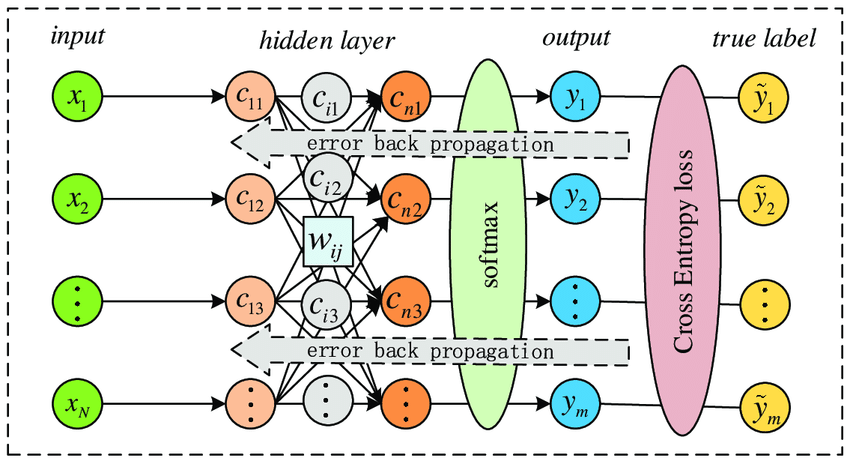

Zhou, Yangfan & Zhang, Mingchuan & Zhu, Junlong & Zheng, Ruijuan & Wu, Qingtao. (2019). MPCE: A Maximum Probability Based Cross Entropy Loss Function for Neural Network Classification. IEEE Access. PP. 1-1. 10.1109/ACCESS.2019.2946264. 

✅ Task: read the instructions above and code the mdoel using keras functions

In [39]:
import keras
print("Building a Neural Network model ..")
nn = Sequential([
    keras.Input(shape = (32,32,3)),
    Flatten(), #Input pictures have to be flattened into vectors
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
nn.summary()

Building a Neural Network model ..
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Define the cost Function for Multinomial Classification in CIFAR-10


#### **Why Use `CategoricalCrossentropy`?**
   - CIFAR-10 is a dataset consisting of images belonging to **10 distinct classes**. For such problems, a multinomial (or multi-class) classification approach is required.
   - `CategoricalCrossentropy` is the standard loss function for measuring the difference between the predicted probability distribution over classes and the true class labels (one-hot encoded).

#### **Mathematical Explanation**
The `CategoricalCrossentropy` loss is calculated as:


$$ \text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{i,j} \cdot \log(\hat{y}_{i,j}) $$

Where:
- (N): Number of examples in the batch.
- (C): Number of classes (10 for CIFAR-10).
- ($y_{i,j}$): True label for class \(j\) (one-hot encoded: 1 for the correct class, 0 otherwise).
- \($hat{y}_{i,j}$): Predicted probability for class (j).

This formula penalizes the model more heavily when it assigns low probability to the correct class.

### Define the optimizer we want to use to find the model parameters during the training

#### **What is `SGD`?**

Stochastic Gradient Descent is a faster, more scalable version of standard Gradient Descent optimizer.  Instead of computing gradients on the entire dataset (as in GD), SGD updates model weights using just one training example (or a small batch) at a time.

#### **Why use it?**
- Faster updates → learns faster in early training

- Adds noise → helps escape local minima and explore better solutions

- Scales well to large datasets where full-batch GD is too slow

✅ Task: read the instructions above and add an SGD optimizer with 0.01 learning rate and a loss function for your NN model

In [40]:
from keras.optimizers import SGD

optimizer = SGD(learning_rate = 0.001)
#If learning rate small: gradient takes small step -> slow learning
#If learning rate large: gradient takes big step -> unstable learning
nn.compile(optimizer = optimizer,
           loss = 'categorical_crossentropy',
           metrics = ['accuracy'] )
# 'categorical_crossentropy' used for multiple classification where labels are One Hot Coded
#If labels y are integers then loss='sparse_categorical_crossentropy'
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


✅ Task: train the model for 50 epochs and plot how the test and train loss change during the training

In [41]:
# train/fit the model 
history = nn.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),  # Track test performance
    epochs=50,
    batch_size=64,
    verbose=1
)

Epoch 1/50
 11/782 [..............................] - ETA: 8s - loss: 2.4873 - accuracy: 0.1023

2025-12-10 19:45:07.603328: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


782/782 [==============================] - 10s 13ms/step - loss: 2.1790 - accuracy: 0.2029 - val_loss: 2.0785 - val_accuracy: 0.2589
Epoch 2/50
782/782 [==============================] - 9s 12ms/step - loss: 2.0271 - accuracy: 0.2754 - val_loss: 1.9881 - val_accuracy: 0.2923
Epoch 3/50
782/782 [==============================] - 9s 12ms/step - loss: 1.9598 - accuracy: 0.3065 - val_loss: 1.9441 - val_accuracy: 0.3111
Epoch 4/50
782/782 [==============================] - 9s 12ms/step - loss: 1.9212 - accuracy: 0.3225 - val_loss: 1.9088 - val_accuracy: 0.3279
Epoch 5/50
782/782 [==============================] - 9s 12ms/step - loss: 1.8954 - accuracy: 0.3341 - val_loss: 1.8894 - val_accuracy: 0.3342
Epoch 6/50
782/782 [==============================] - 9s 12ms/step - loss: 1.8769 - accuracy: 0.3425 - val_loss: 1.8730 - val_accuracy: 0.3438
Epoch 7/50
782/782 [==============================] - 9s 12ms/step - loss: 1.8629 - accuracy: 0.3485 - val_loss: 1.8601 - val_accuracy: 0.3454
Epoch 8/5

In [42]:
nn.evaluate(X_test,y_test_cat)

313/313 [==============================] - 3s 10ms/step - loss: 1.7441 - accuracy: 0.3992


[1.744078516960144, 0.3991999924182892]

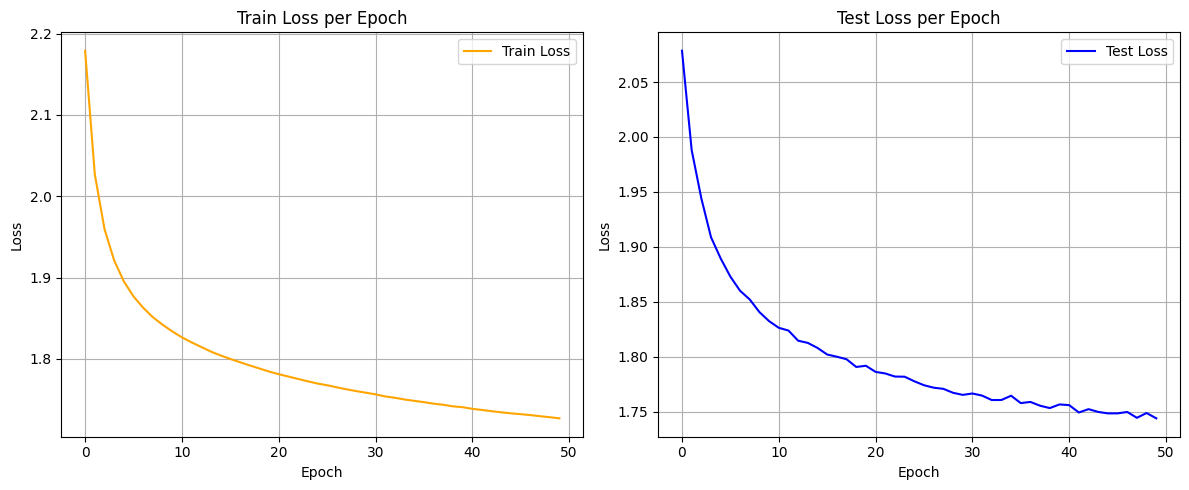

In [43]:
# plot the training by create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot Train Loss
axs[0].plot(history.history['loss'], label='Train Loss', color='orange')
axs[0].set_title('Train Loss per Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot Test (Validation) Loss
axs[1].plot(history.history['val_loss'], label='Test Loss', color='blue')
axs[1].set_title('Test Loss per Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

✅ Task: try different learning rates, 0.001, 0.01, 0.1 and explain what happened to the models train and test error. Write your observation below.

🔁 Remember: You must rebuild and recompile the model before training with each new learning rate. Reusing the same model can lead to misleading results.

In [44]:
#REBUILD WITH OPTIMIZER'S learning_rate = 0.05

#1: Build model Sequential
import keras
nn2 = Sequential([
    keras.Input(shape = (32,32,3)),
    Flatten(),
    Dense(128, activation ='relu'),
    Dense(10, activation = 'softmax')
])
nn2.summary()

#2: Compile model
from keras.optimizers import SGD
nn2.compile(
    optimizer = SGD(learning_rate = 0.05),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
nn2.summary()

#3: Train model
history2 = nn2.fit(
    X_train, y_train_cat,
    validation_data = (X_test, y_test_cat),
    verbose = 1,
    epochs = 50,
    batch_size = 64
)

#4: Evaluate model
nn2.evaluate(X_test, y_test_cat)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
 12/782 [..............................] - ETA: 7s - loss: 5.4152 - accuracy: 0.0872

2025-12-10 20:01:59.104692: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


782/782 [==============================] - 12s 16ms/step - loss: 4.9894 - accuracy: 0.1607 - val_loss: 6.2983 - val_accuracy: 0.1702
Epoch 2/50
782/782 [==============================] - 10s 12ms/step - loss: 7.3990 - accuracy: 0.1787 - val_loss: 9.9616 - val_accuracy: 0.1265
Epoch 3/50
782/782 [==============================] - 9s 12ms/step - loss: 9.7023 - accuracy: 0.1788 - val_loss: 11.6591 - val_accuracy: 0.1685
Epoch 4/50
782/782 [==============================] - 10s 12ms/step - loss: 11.8301 - accuracy: 0.1821 - val_loss: 12.3707 - val_accuracy: 0.1939
Epoch 5/50
782/782 [==============================] - 10s 12ms/step - loss: 12.1848 - accuracy: 0.1886 - val_loss: 22.2689 - val_accuracy: 0.1571
Epoch 6/50
782/782 [==============================] - 9s 12ms/step - loss: 15.4594 - accuracy: 0.1844 - val_loss: 23.5705 - val_accuracy: 0.2220
Epoch 7/50
782/782 [==============================] - 9s 12ms/step - loss: 17.8842 - accuracy: 0.1811 - val_loss: 23.8876 - val_accuracy: 0.18

[431.5140075683594, 0.2524000108242035]

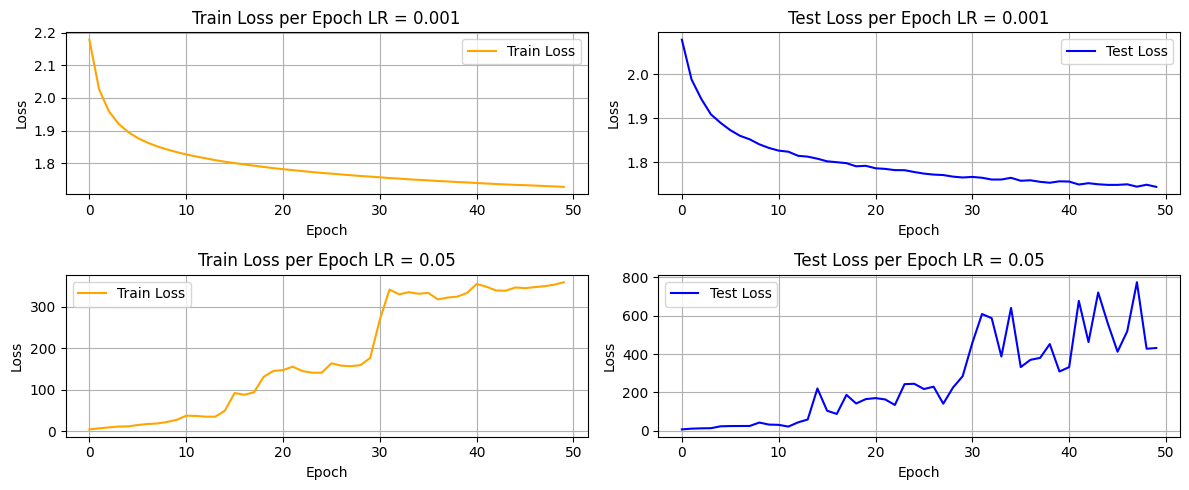

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))  

# Plot Train Loss for learning rate = 0.001
axs[0,0].plot(history.history['loss'], label='Train Loss', color='orange')
axs[0,0].set_title('Train Loss per Epoch LR = 0.001')
axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Loss')
axs[0,0].legend()
axs[0,0].grid(True)

# Plot Test (Validation) Loss
axs[0, 1].plot(history.history['val_loss'], label='Test Loss', color='blue')
axs[0, 1].set_title('Test Loss per Epoch LR = 0.001')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot Train Loss
axs[1,0].plot(history2.history['loss'], label='Train Loss', color='orange')
axs[1,0].set_title('Train Loss per Epoch LR = 0.05')
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Loss')
axs[1,0].legend()
axs[1,0].grid(True)

# Plot Test (Validation) Loss
axs[1,1].plot(history2.history['val_loss'], label='Test Loss', color='blue')
axs[1,1].set_title('Test Loss per Epoch LR = 0.05')
axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('Loss')
axs[1,1].legend()
axs[1,1].grid(True)
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
answer = """
learning_rate = 0.001: Training is stable but slow. May underfit if we dont run for enough epochs
learning_rate=0.05: aggressive learning, cause unstable training and poor test performance.
"""

✅ Task: predict class labels for the test data and print the classification report (remember that your models' output is a vector)

In [46]:
# Predict class labels
# your code here
nn_predict = np.argmax(nn.predict(X_test),axis=1)
nn_predict
y_test
print(classification_report(y_test, nn_predict))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.44      0.43      0.44      1000
           1       0.45      0.49      0.47      1000
           2       0.30      0.24      0.26      1000
           3       0.29      0.30      0.29      1000
           4       0.35      0.40      0.37      1000
           5       0.36      0.32      0.34      1000
           6       0.44      0.41      0.43      1000
           7       0.47      0.42      0.44      1000
           8       0.44      0.55      0.49      1000
           9       0.46      0.42      0.44      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



✅ Task: plot the Confusion Matrices for the neural network

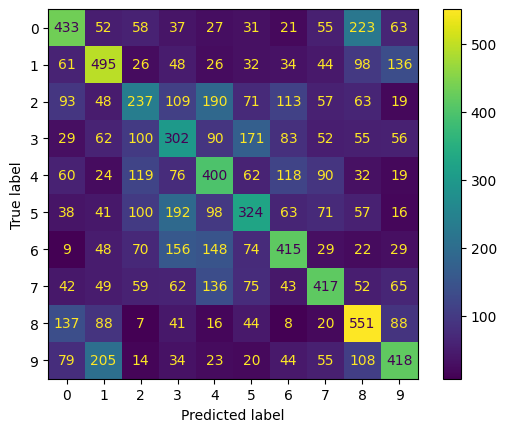

In [47]:
# your code here
confusion_matrix(y_test,nn_predict)
ConfusionMatrixDisplay.from_predictions(y_test,nn_predict)